# Numerical Ordinary Differential Equations and Applications
## Computer Programming assignment 1: Pirate Ship

D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, 2021

In this first computer programming assignment we will investigate curves of pursuit with the Euler method. This is a template Jupyter notebook that (i) gets you started and (ii) sets the four tasks that make up the assignment.
In order to complete the assigment, you must perform the four tasks by editing and/or adding further content to this notebook.
Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots.
To submit your completed work (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"), (b) submit both the .ipynb and .pdf versions" electronically on **Learn**. Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. Make sure that your name is clearly indicated at the top of notebook.
The deadline is **midday on Monday 25th January** and, as for all continuous assessment in this course, **there are no extensions and standard University of Edinburgh penalties apply for late submission**. Please keep a record of your **electronic submission receipt**.

First we will import some modules.

In [2]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots

### Pirate ship sees cargo ship

*Curves of pursuit* arise in many contexts where there is a moving target. Suppose, in the year 1717, a lookout on board Blackbeard's pirate ship spots a cargo ship in the distance. We will assume that, as an attempt to evade the pirate ship, the cargo ship follows a predefined path $(r(t),s(t))$. We will also assume that (a) the pirate ship moves at a speed that is a constant factor $k$ times the speed of the cargo ship and (b) the pirate ship chases in such a way that at all times its tangent points at the cargo ship. It is then possible to show that the path $(x(t),y(t))$ of the pirate ship satisfies a system of two ODEs 

$$  
x'(t) = R(t) \left( r(t) - x(t) \right),
$$
$$
y'(t) = R(t) \left( s(t) - y(t) \right),
$$
where
$$
 R(t) = \frac{ k \sqrt{ r'(t)^2 + s'(t)^2} }{ \sqrt{ (r(t) - x(t))^2  + (s(t) - y(t))^2} }.
$$

Suppose that initially, at time $t = 0$, the pirate ship is located at $(0,3)$
Also suppose that, in an attempt to evade the pirate ship, the cargo ship follows the arc of a circle
$$
 r(t) = 5 - 3 \cos(t),
$$
$$
 s(t) = -3 \sin(t).
$$
 
In the code below we apply the Euler method to this ODE system in the case where $k = 0.9$. We simulate over $ 0 \le t \le 5$ with a stepsize of $h = 0.01$. We have tried to make the code as simple as possible to follow. Note that we have used a while loop, rather than a for loop. Also, we update the numerical solution from one time point to the next by appending to an array. This structure is natural for the tasks that follow.  

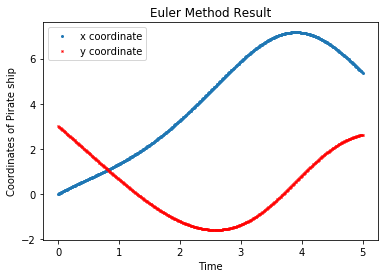

In [3]:
xzero = 0.    # initial x value of pirate ship
yzero = 3.    # initial y value of pirate ship
T = 5.        # final value of t  
h = 0.01      # stepsize

k = 0.9
t = 0.

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while t < T:              # the while loop structure will be useful for the tasks
    ##### Evaluate RHS of ODE system #####
    r = 5 - 3*np.cos(t)  # current x coord of cargo ship
    s = -3*np.sin(t)  # current y coord of cargo ship
    
    rprime = 3*np.sin(t)   # time deriv of r
    sprime = -3*np.cos(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])
    yprime = R*(s-y[n])
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,T,N)  # t values along the path

plt.plot(tvals, x, 'o', markersize=2, label = 'x coordinate')
plt.plot(tvals, y, 'rx', markersize=2, label = 'y coordinate')
plt.xlabel('Time')
plt.ylabel(r'Coordinates of Pirate ship')
plt.title('Euler Method Result')
plt.legend()
plt.show()

### Phase Plane
To get a better feel for the behaviour of the pirate ship, we now produce a *phase plane* picture; that is, plot $x(t)$ on the x-axis against $y(t)$ on the y-axis. We also superimpose the path taken by the cargo ship on the same picture.


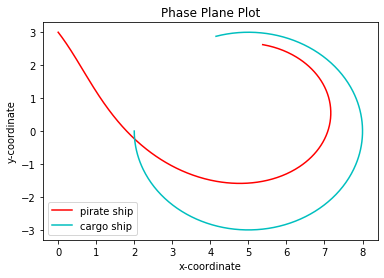

In [4]:
#We haven't stored the cargo ship's path
#So have to recompute it
rvals = 5 - 3*np.cos(tvals)  # x coords of cargo ship
svals = -3*np.sin(tvals)     # y coords of cargo ship
plt.plot(x, y,'r-', markersize=2, label = 'pirate ship')
plt.plot(rvals, svals,'c-', markersize=4, label = 'cargo ship')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()

# Task 1

[3 marks]

The ODE system breaks down if $x(t) = r(t)$ and $y(t) = s(t)$. This makes sense---if the pirate ship and cargo ship are at the same point then the pirate ship can no longer move towards the cargo ship. In the case where $k > 1$ we would expect the pirate ship to catch up with the cargo ship at some finite time. Computationally, we can simulate the system until the pirate ship gets *sufficiently close* to the cargo ship. 

We will let $t^\star$ denote the first time that the Euclidean distance between the pirate ship and cargo ship reaches ${10}^{-3}$. Using the value $k = 1.25$ (and using the same starting point for the pirate ship, the same path for the cargo ship and the same stepsize as in the example above), (a) compute and display an estimate for $t^\star$ and (b) produce a new phase-plane figure that shows the paths of the pirate ship and cargo ship.

Hint: you can copy and paste the code above, and then make the appropriate edits. You may wish to alter the while loop so that you have something of the form "while the pirate ship and cargo ship are more than Euclidean distance $10^{-3}$ apart". 

3.5499999999999683


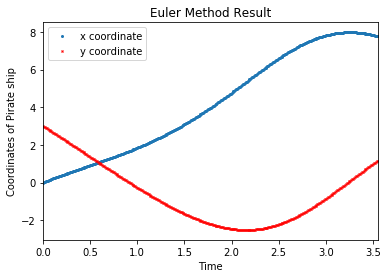

In [21]:
# your code, producing the output for Task 1 

xzero = 0.    # initial x value of pirate ship
yzero = 3.    # initial y value of pirate ship
T = 5.        # final value of t  
h = 0.01      # stepsize

k = 1.25
t = 0.

x = [xzero]      # list of x coords of pirate ship
y = [yzero]      # list of y coords of pirate ship

rzero = 5 - 3*np.cos(t)    # initial x coord of cargo ship
szero = -3*np.sin(t)       # initial y coord of cargo ship

rvals = [rzero]  # x coords of cargo ship
svals = [szero]  # y coords of cargo ship

distance = np.sqrt((rzero - xzero)**2 + (szero - yzero)**2)   # distance between ship

n = 0  # number of steps taken so far

while distance > 1e-3: 
    ##### Evaluate RHS of ODE system #####
    r_updated = 5 - 3*np.cos(t)  # current x coord of cargo ship
    s_updated = -3*np.sin(t)     # current y coord of cargo ship
    
    rprime = 3*np.sin(t)   # time deriv of r
    sprime = -3*np.cos(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r_updated - x[n])**2 + (s_updated - y[n])**2)
    R = numerator/denom
    
    xprime = R*(r_updated-x[n])
    yprime = R*(s_updated-y[n])
    #####################################
    
    ##### Update lists of x and y coords of cargo ship #####
    rvals.append(r_updated)
    svals.append(s_updated)
    
    ##### Take one step of Euler #######
    x_updated = x[n] + h*xprime
    y_updated = y[n] + h*yprime
    
    ##### Update lists of x and y coords of pirate ship #####
    x.append(x_updated)
    y.append(y_updated)
    
    ##### Compute distance between ships #####
    distance = np.sqrt((r_updated - x_updated)**2 + (s_updated - y_updated)**2)
               
    # Update variables
    n += 1
    t += h

tstar = t
print(tstar)

# plot the solution
N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,tstar,N)  # t values along the path
#plt.plot(tvals, distvals)
#plt.show()

plt.plot(tvals, x, 'o', markersize=2, label = 'x coordinate')
plt.plot(tvals, y, 'rx', markersize=2, label = 'y coordinate')
plt.xlabel('Time')
plt.ylabel(r'Coordinates of Pirate ship')
plt.title('Euler Method Result')
plt.xlim([min(tvals), max(tvals)])
plt.legend()
plt.show()

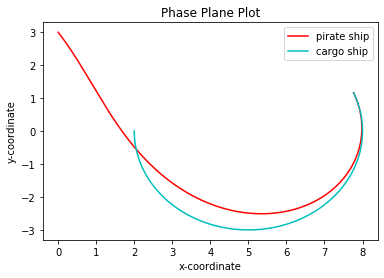

In [6]:
#### Phase shift diagram ####

plt.plot(x, y,'r-', markersize=2, label = 'pirate ship')
plt.plot(rvals, svals,'c-', markersize=4, label = 'cargo ship')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()

# Task 2

[5 marks]


Your next task is to check the value of $t^\star$ that you computed in Task 1 by repeating the computation for smaller values of the stepsize. Give an approximation to $t^\star$ that you are confident is accurate to three significant figures.
How does the error in your approximation appear to behave as a function of the stepsize? Justify your answers.

Hint: you could use the *input* command to allow the user to specify the variable h, and then observe and report the $t^\star$ approximations that arise for different choices. More experienced Python users may wish to create a function that takes a value of $h$ and returns a value of $t^\star$.


In [ ]:
# inputting h manually
xzero = 0.    # initial x value of pirate ship
yzero = 3.    # initial y value of pirate ship
T = 5.        # final value of t  

h = np.float(input("h = "))     # input h value
#tstars = np.zeros(h.size)

k = 1.25
t = 0.

x = [xzero]
y = [yzero]

rzero = 5 - 3*np.cos(t)    # initial x coord of cargo ship
szero = -3*np.sin(t)       # initial y coord of cargo ship

rvals = [rzero]  # x coords of cargo ship
svals = [szero]  # y coords of cargo ship

distance = np.sqrt((rzero - xzero)**2 + (szero - yzero)**2)
distvals = [distance]

n = 0  # number of steps taken so far


while distance > 1e-3: 
    ##### Evaluate RHS of ODE system #####
    r_updated = 5 - 3*np.cos(t)  # current x coord of cargo ship
    s_updated = -3*np.sin(t)  # current y coord of cargo ship

    rprime = 3*np.sin(t)   # time deriv of r
    sprime = -3*np.cos(t)  # time deriv of s

    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r_updated - x[n])**2 + (s_updated - y[n])**2)
    R = numerator/denom
    xprime = R*(r_updated-x[n])
    yprime = R*(s_updated-y[n])
    #####################################

    rvals.append(r_updated)
    svals.append(s_updated)

    ##### Take one step of Euler #######
    x_updated = x[n] + h*xprime
    y_updated = y[n] + h*yprime
    
    ##### Update lists of x and y coords of pirate ship #####
    x.append(x_updated)
    y.append(y_updated)

    ##### Compute distance between ships #####
    distance = np.sqrt((r_updated - x_updated)**2 + (s_updated - y_updated)**2)
    distvals.append(distance)

    # Update variables
    n += 1
    t += h

##### last time value taken is t* #####
tstar = t
print(tstar)

plt.plot(x, y,'r-', markersize=2, label = 'pirate ship')
plt.plot(rvals, svals,'c-', markersize=4, label = 'cargo ship')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()

**Your estimate for $t^\star$ and how you arrived at it.**

Through varying the values of $h$ we obtain the following dataset:

|$h$ |  $t^\star$  |
| --- | --- |
| 0.01 | 3.550 |
| 0.004 | 3.564 |
| 0.003 | 3.567 |
| 0.002 | 3.570 |
| 0.001 | 3.571 |
| 0.0004 | 3.573 |
| 0.0003 | 3.573 |
| 0.0002 | 3.574 |
| 0.0001 | 3.574 |
| 0.00001 | 3.574 |
| 0.000001 | 3.574 |

Thus, a good approximation is $t^\star = 3.57$
We arrived at this estimate by varying h 

**Your description of how the error behaves as a function of the stepsize.**

The error in the approximation appears to decrease as stepsize also decreases. This is because, the smaller the step size the less the growth of the solution ,i.e, growth of numerical error. This also implies that Euler's method converges - as $h$ tends to zero, so does the error. As proven by **Theorem 2.6.1**, the error is bounded by $Dh$ in magnitude (where $D$ is a positive constant).

# Task 3

[2 marks]

Make up your own pair of functions $r(t)$ and $s(t)$ and choose values for $k$, $T$ and the initial location of the pirate ship. Plot the resulting phase diagram. Anything that is correctly implemented and looks different to the example above will be fine.

A description of your choices for $r(t)$, $s(t)$, $k$, $T$ and the initial location of the pirate ship.

The following pair of functions was used:

$
r(t) = 4 - 5sin(t) \\
s(t) = -3cos(t)
$

In addition, we have taken $k = 1.15$ and $T = 5.0$. The initial location of the pirate ship was taken to be at $(3,3)$

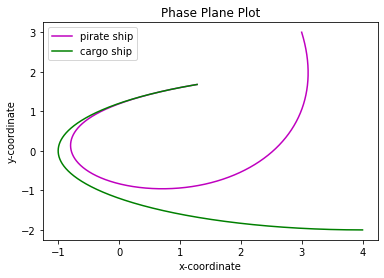

In [8]:
xzero = 3.    # initial x value of pirate ship
yzero = 3.    # initial y value of pirate ship
T = 5.        # final value of t  
h = 0.001     # stepsize

k = 1.15
t = 0.

x = [xzero]
y = [yzero]

rzero = 4 - 5*np.sin(t)    # initial x coord of cargo ship
szero = -2*np.cos(t)       # initial y coord of cargo ship

rvals = [rzero]  # x coords of cargo ship
svals = [szero]  # y coords of cargo ship

distance = np.sqrt((rzero - xzero)**2 + (szero - yzero)**2)
distvals = [distance]

n = 0  # number of steps taken so far

while distance > 1e-3: 
    ##### Evaluate RHS of ODE system #####
    r_updated = 4 - 5*np.sin(t)  # current x coord of cargo ship
    s_updated = -2*np.cos(t)  # current y coord of cargo ship
    
    rprime = -5*np.cos(t)   # time deriv of r
    sprime = 2*np.sin(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r_updated - x[n])**2 + (s_updated - y[n])**2)
    R = numerator/denom
    xprime = R*(r_updated-x[n])
    yprime = R*(s_updated-y[n])
    #####################################

    rvals.append(r_updated)
    svals.append(s_updated)
    
    ##### Take one step of Euler #######
    x_updated = x[n] + h*xprime
    y_updated = y[n] + h*yprime
    
    ##### Update lists of x and y coords of pirate ship #####
    x.append(x_updated)
    y.append(y_updated)
    
    ##### Compute distance between ships #####
    distance = np.sqrt((r_updated - x_updated)**2 + (s_updated - y_updated)**2)
    distvals.append(distance)
                 
    # Update variables
    n += 1
    t += h


# plot the solution
N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,tstar,N)  # t values along the path


#Phase Diagram
plt.plot(x, y,'m-', markersize=2, label = 'pirate ship')
plt.plot(rvals, svals,'g-', markersize=2, label = 'cargo ship')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()

# Task 4

[5 marks]

Suppose that the pirate ship starts at the point $(0,2)$. Suppose also that the cargo ship starts at the point $(2,0)$ and heads in a straight line along the positive horizontal axis. Finally, suppose that $k=1$, so that both ships have the same speed. 

In this circumstance, it can be shown that as $t \to \infty$ the distance between the two ships converges to a fixed value, $d^\star$. Conduct an experiment to determine $d^\star$ to three significant figures. As well as writing the python code and reporting your answer, briefly (i.e., in one or two sentences) discuss the sources of error in your computation. 

In [29]:
xzero = 0.    # initial x value of pirate ship
yzero = 2.    # initial y value of pirate ship
T = 200.      # final value of t  
h = 0.001     # stepsize

k = 1.
t = 0.

tvals = np.linspace(0,T,(T/h))

x = [xzero]
y = [yzero]

rzero = 2.    # initial x coord of cargo ship
szero = 0.       # initial y coord of cargo ship

rvals = [rzero]  # x coords of cargo ship
svals = [szero]  # y coords of cargo ship

n = 0  # number of steps taken so far

dvals = []

while t < T:
    ##### Evaluate RHS of ODE system #####
    r_updated = 5 - 3*np.cos(t)  # current x coord of cargo ship
    s_updated = -3*np.sin(t)  # current y coord of cargo ship

    rprime = 3*np.sin(t)   # time deriv of r
    sprime = -3*np.cos(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r_updated - x[n])**2 + (s_updated - y[n])**2)
    R = numerator/denom
    
    xprime = R*(r_updated-x[n])
    yprime = R*(s_updated-y[n])
    #####################################

    rvals.append(r_updated)
    svals.append(s_updated)
    
    ##### Take one step of Euler #######
    x_updated = x[n] + h*xprime
    y_updated = y[n] + h*yprime
    
    ##### Update lists of x and y coords of pirate ship #####
    x.append(x_updated)
    y.append(y_updated)
    
    ##### Compute distance between ships #####
    distance = np.sqrt((r_updated - x_updated)**2 + (s_updated - y_updated)**2)
    dvals.append(distance)
                 
    # Update variables
    n += 1
    t += h

By plotting the distance between the two ships for a long time period, we observe that the curve levels off enough to be able to observe that there is an asymptote, indicating convergence, which, in this case, is $d^\star$. Hence, a good estimate for $d^\star$ would be the last value in the list of distances which is created above.

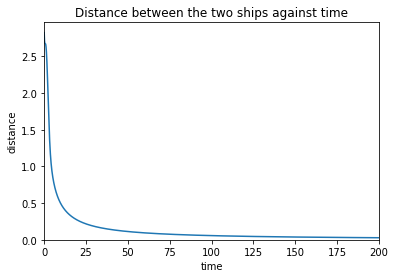

In [30]:
##### Plot graph of distance against time #####
plt.plot(tvals,dvals)
plt.xlabel('time')
plt.ylabel('distance')
plt.title('Distance between the two ships against time')
plt.xlim([0, tvals[-1]])
plt.ylim(0)
plt.show()

Your final estimate of $d^\star$ to three significant figures, with justification, and your brief discussion of the sources of error in this computation. 



In [28]:
#estimate for d*
dstar = round(dvals[-1],4)
print('d* = ' + str(dstar))

d* = 0.0281


The final estimate of $d^\star$ is $0.0281$ to 3 significant figures.

Sources of error include include truncation errors from approximations made through the use of Euler's method to solve the initial value problem, such as using a finite step size $h$ and error committed in approximating the integral curve by the tangent line. Euler’s method assumes that $y_{i+1}$ is an approximation to $y(x_{i+1}$ when solving for a given function $y(x)$. Another source of error includes roundoff errors which arise from the fact that computers do arithmetic with a fixed number of digits, and therefore make errors in evaluating the formulas defining the numerical methods.